In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import numpy as np
import pandas as pd
import math
from sklearn.metrics import jaccard_score
from sklearn.metrics import normalized_mutual_info_score
from scipy.stats import spearmanr
import seaborn as sns

In [28]:
greedy_fp = "../best_greedy.csv"
deg_fp = "../deg_add.csv"
w_fp = "../w_add.csv"
greedy_df = pd.read_csv(greedy_fp)
w_df = pd.read_csv(w_fp)
deg_df = pd.read_csv(deg_fp)

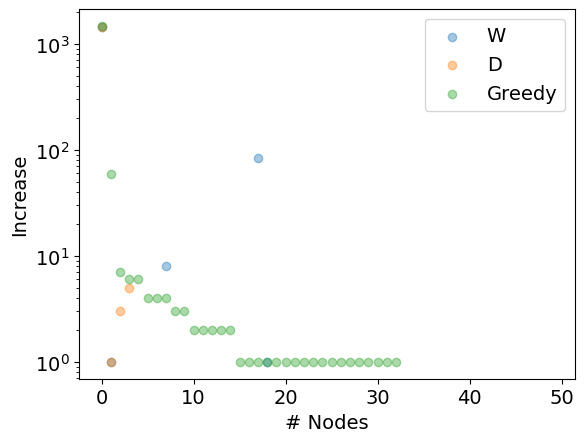

In [30]:
end_val = 50
x_vals = [i for i in range(0,end_val)]
plt.scatter(x_vals,w_df["add_amount"][0:end_val],label="W",alpha=0.4)
plt.scatter(x_vals,deg_df["add_amount"][0:end_val],label="D",alpha=0.4)
plt.scatter(x_vals,greedy_df["add_amount"][0:end_val],label="Greedy",alpha=0.4)
plt.legend()
plt.yscale("log")
plt.xlabel("# Nodes")
plt.ylabel("Increase")
plt.savefig("greedy_f.png")

## D Final: 1453
## W Final: 1537,
## Greedy Final: 1596

In [27]:
### jaccard similarties
def jaccard_similarity(set1, set2):
    # intersection of two sets
    intersection = len(set1.intersection(set2))
    # Unions of two sets
    union = len(set1.union(set2))
    
    return intersection / union
deg_id  = list(deg_df["sent_id"][0:end_val])
w_id = list(w_df["sent_id"][0:end_val])
greedy_id =list(greedy_df["sent_id"][0:end_val])
print("g vs w: ",jaccard_similarity(set(greedy_id),set(w_id)))
print("g vs d: ",jaccard_similarity(set(greedy_id),set(deg_id)))
print("d vs w: ",jaccard_similarity(set(deg_id),set(w_id)))

g vs w:  0.0
g vs d:  0.0
d vs w:  0.17647058823529413


In [5]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth 
    (specified in decimal degrees) using the Haversine formula.

    Args:
        lat1 (float): Latitude of the first point in degrees.
        lon1 (float): Longitude of the first point in degrees.
        lat2 (float): Latitude of the second point in degrees.
        lon2 (float): Longitude of the second point in degrees.

    Returns:
        float: The distance between the two points in kilometers.
    """
    R = 6371.0  # Earth radius in kilometers

    # Convert degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Difference in coordinates
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = R * c
    return distance
def calc_distance(greedy_df,prop_df):
    lat = list(prop_df["GPS_CENTRE_LATITUDE"])
    long = list(prop_df["GPS_CENTRE_LONGITUDE"])
    prop_id = list(prop_df["PROPERTY_ID"])
    comm_props = []

    latlong_dict = {}
    for i,p in enumerate(prop_id):
        latlong_dict[p] = (lat[i],long[i])

    all_dist = []
    node_ids = list(greedy_df["sent_id"])
    add_id = list(greedy_df["add_id"])
    amount_increase = list(greedy_df["add_amount"])
    dist_dict = {}
    for i in range(0,len(node_ids)):
        a_coords = latlong_dict[node_ids[i]]
        b_coords = latlong_dict[add_id[i]]
        dist_val = haversine_distance(a_coords[0],a_coords[1],b_coords[0],b_coords[1])
        x = amount_increase[i]
        dist_dict[(node_ids[i],add_id[i])] = (dist_val,x)

    return dist_dict


                

In [6]:
## distance for each pair
prop_df = pd.read_csv("../params/2024_prop_dat.csv")
dist_combos = calc_distance(greedy_df,prop_df)
combos = dist_combos.values()
all_dist_values = [c[0] for c in combos]
all_add_values = [c[1] for c in combos]

Text(0, 0.5, 'Count')

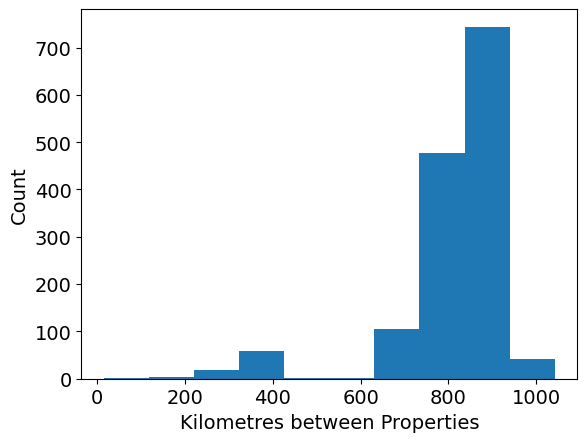

In [7]:
plt.hist(all_dist_values)
plt.xlabel("Kilometres between Properties")
plt.ylabel("Count")

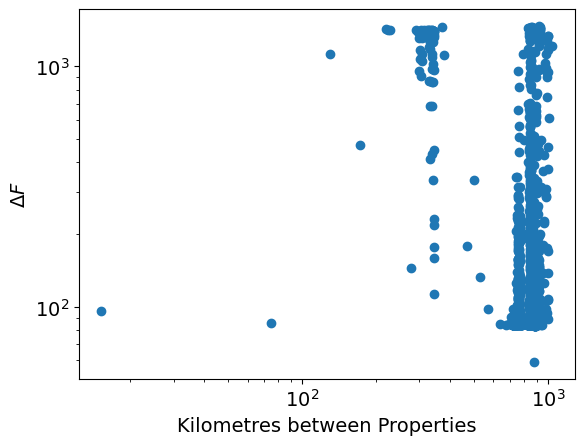

In [8]:
plt.scatter(all_dist_values,all_add_values)
plt.xlabel("Kilometres between Properties")
plt.ylabel(f"$\Delta F$")
plt.xscale("log")
plt.yscale("log")